<a href="https://colab.research.google.com/github/SLTHRN/Heart_disease_ML/blob/main/Project_v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### IMPORT LIBRARIES

import torch
import torch.nn as nn
from torch.utils.data.sampler import SubsetRandomSampler

import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn


In [2]:
### IMPORTING CSV FILE FROM GOOGLE DRIVE

import csv
from google.colab import drive
drive.mount('/content/drive')

#FILE LOCATION IN GOOGLE DRIVE
directory = '/content/drive/MyDrive/APS360PROJECT/New data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
### DEFINING CNN MODEL NETWORK

import torch
import torch.nn as nn
import torch.nn.functional as F

#DEFINING A 3 LAYER FULLY CONNECTED MODEL
class neuralNetwork(nn.Module):

  def __init__(self):
    super(neuralNetwork, self).__init__()
    self.layer1 = nn.Linear(13,50)
    self.layer2 = nn.Linear(50,70)
    self.layer3 = nn.Linear(70,1)

  def forward(self, x):
    #x = x.squeeze()
    activation1 = self.layer1(x)
    activation1 = F.relu(activation1)
    activation2 = F.relu(self.layer2(activation1))
    output = self.layer3(activation2)
    return output

In [4]:
### LOADING CSV FILE FROM DIRECTORY

def load_csv(directory):
  file = open(directory, "r")
  retrieved = csv.reader(file)

  data_size = -1
  dictionary = {}
  data = []

  for row in retrieved:
    data_size+= 1
    if data_size == 0:
      for i in range(len(row)):
        dictionary[i] = row[i]
    else:
      data.append(row)

  return data_size, data, dictionary

In [5]:
### DATA STRING TO FLOAT

def str_to_flt(data):
  fail_count = 0

  for i in range(len(data)):
    row = data[i]
    new_row = []
    for j in range(len(row)):
      if row[j].isnumeric():
        new_row.append(float(row[j]))
      else:
        test = row[j].split('.')
        if len(test) == 2 and (test[0].isnumeric() and test[1].isnumeric()):
          new_row.append(float(row[j]))
        else:
          fail_count += 1
          print('!!!!!! Not Numeric, count:' + str(fail_count))
          new_row.append(row[j])
    data[i] = new_row
  return data

In [6]:
### GET LABELS

def seperate_labels(data):
  labels = []

  for row in data:
    labels.append(int(row[-1]))
    del row[-1]

  labels = get_binary(labels)

  return data, labels

In [7]:
### TURN LABELS INTO BINARY CLASSES

def get_binary(labels):
  new_labels = []
  for label in labels:
    if label == 0.0:
      new_labels.append(0.0)
    else:
      new_labels.append(1.0)
  return new_labels


In [8]:
### GENERATING SAMPLERS FOR DATALOADERS

def get_samplers(data_size):
  torch.manual_seed(0)
  index = torch.randperm(data_size)
  end_training = int(len(index)*0.6) # Defining index for last data sample in training data
  end_validation = end_training + int(len(index)*0.2) # Defining index for last data sample in validation set

  training_sampler, validation_sampler, testing_sampler = index[:end_training], index[end_training:end_validation], index[end_validation:]

  return training_sampler, validation_sampler, testing_sampler

In [9]:
### GENERATING DATA LOADERS

def get_loaders(data, sampler, batch_size = 64):
  dataset = torch.tensor(data)

  loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, sampler=sampler)
  
  return loader

In [10]:
### CALCULATE ACCURACY OF MODEL

def get_accuracy(model, d_loader, l_loader):
  correct = 0
  total = 0

  for (data, label) in zip(d_loader, l_loader):
    output = model(data)
    for i in range(len(output)):
      total += 1.0
      if output[i] >= 0.5:
        pred = 1.0
      else:
        pred = 0.0
      if pred == label[i]:
        correct += 1.0
  return correct/total

In [11]:
### MODEL TRAINING

def training(t_loader, t_label_loader, v_loader, v_label_loader, epochs=10, learning_rate=0.001):
  n = 0
  iters, losses, training_accuracy, validation_accuracy = [], [], [], []

  model = neuralNetwork()
  criterion = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


  for epoch in range(epochs):
    for (data, label) in zip(t_loader, t_label_loader):
      output = model(data)
      print(label)
      print(output)
      loss = criterion(output.squeeze(), label)
      print(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      iters.append(n)
      losses.append(float(loss)/batch_size)
      training_accuracy.append(get_accuracy(model, t_loader, t_label_loader))
      validation_accuracy.append(get_accuracy(model, v_loader, v_label_loader))
      n += 1

  plt.title("Training")
  plt.plot(iters, losses, label="Train")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()

  plt.title("Accuracies")
  plt.plot(iters, validation_accuracy, label = "Validation")
  plt.plot(iters, training_accuracy, label = "Training")
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.show

  print("Final loss: {}".format(losses[-1]))
  print("Final training accuracy: {}".format(training_accuracy[-1]))
  print("Final validation accuracy: {}".format(validation_accuracy[-1]))

tensor([1., 0., 1., 0., 1., 1., 0., 0., 0., 0.])
tensor([[ 2.6011],
        [ 1.1924],
        [-0.9783],
        [ 1.2791],
        [ 0.2646],
        [-0.6229],
        [ 1.7121],
        [ 2.4939],
        [ 2.7218],
        [ 2.7995]], grad_fn=<AddmmBackward>)
tensor(1.6068, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor([1., 0., 1., 1., 0., 1., 1., 1., 0., 0.])
tensor([[-4.5133],
        [-2.8893],
        [-0.7219],
        [-2.4277],
        [-1.2631],
        [-1.7821],
        [-1.0375],
        [-2.8262],
        [-1.2407],
        [-2.3772]], grad_fn=<AddmmBackward>)
tensor(1.4962, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor([1., 0., 0., 0., 0., 1., 1., 0., 0., 1.])
tensor([[-1.9087],
        [-2.6201],
        [-1.7777],
        [-1.8376],
        [ 0.2568],
        [-3.3776],
        [-1.3446],
        [-0.4736],
        [-4.2215],
        [-1.3699]], grad_fn=<AddmmBackward>)
tensor(1.0333, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor([1., 1., 

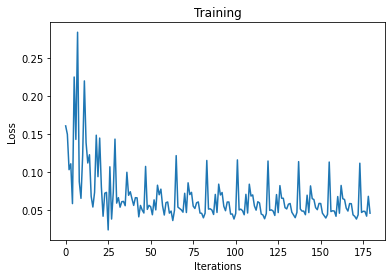

Final loss: 0.04634764492511749
Final training accuracy: 0.7303370786516854
Final validation accuracy: 0.6949152542372882


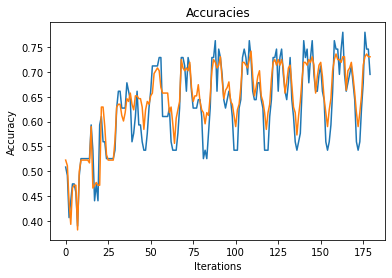

In [12]:
### RUNNING THE CODE

data_size, data, dictionary = load_csv(directory)
data = str_to_flt(data)
data, labels = seperate_labels(data)
training_sampler, validation_sampler, testing_sampler = get_samplers(data_size)

batch_size = 10
training_loader = get_loaders(data, training_sampler, batch_size)
training_label_loader = get_loaders(labels, training_sampler, batch_size)
validation_loader = get_loaders(data, validation_sampler, batch_size)
validation_label_loader = get_loaders(labels, validation_sampler, batch_size)
testing_loader = get_loaders(data, testing_sampler, batch_size)
testing_label_loader = get_loaders(labels, testing_sampler, batch_size)

training(training_loader, training_label_loader, validation_loader, validation_label_loader)